C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in sqrt
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in multiply
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in sqrt
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in sqrt
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in sqrt
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in sqrt


Value of decay width at 125 GeV is 0.012338549852605664
Value of decay width at 400 GeV is 22.720926039641785
Value of decay width at 600 GeV is 109.51263344461942
Value of decay width at 1000 GeV is 536.2202991027979
Values of m_H for which G/mh < 0.01: 239.44106349709253


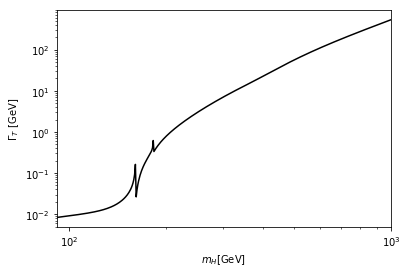

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Fermi constant 
G_F = 1.16637e-5

# Masses of particles
m_W = 80.398
m_Z = 91.1876
m_c = 1.40
m_b = 4.75
m_t = 172.5
m_tau = 1.777

#Array of masses of fermions
fermarray = np.array([m_c,m_b,m_t,m_tau])

#Array of masses of quarks
quarkarray = np.array([m_c,m_b,m_t])

#Weinberg Angle
c_W = m_W/m_Z

#sine of Weinberg angle
s_W = np.sqrt(1 - c_W**2)    
    
#Weak fine structure constant
alpha = (np.sqrt(2)/np.pi) * G_F * m_W**2 * s_W**2 
#Strong fine structure constant
alpha_S = 0.118
    
#Elementary charge in natural units
e = np.sqrt(4 * np.pi * alpha)
g_W = e/s_W
g_Z = g_W/c_W

def N_C(m):
    if m == m_tau:
        N = 1
    else:
        N = 3
    return N

def Q_f(m):
    if m == m_tau:
        Q = -1
    elif m == m_b:
        Q = -1/3
    else:
        Q = +2/3
    return Q

#Function for calculation tau(m)
def tau(m, m_H):
    tau = 4 * (m**2/m_H**2)
    return tau

#Function for calculating Beta(m)
def beta(m, m_H):
    beta = 1 - tau(m, m_H)
    return beta

#Function for calculating lambda(m)
def lambd(m):
    lambd = 4 * (m**2/m_Z**2)
    return lambd

#Function for calculating f(tau)
def ftau(m, m_H):
    frac = (1+np.sqrt(1 - tau(m,m_H)))/(1 - np.sqrt(1 - tau(m,m_H)))
    if tau(m, m_H) >= 1:
        func = np.arcsin(1/(np.sqrt(tau(m,m_H))))**2
    elif tau(m, m_H) < 1:
        func = -1/4 * (np.log(frac) - 1j*np.pi)**2
    return func

#Function for calculating f(lambda)
def flambd(m, m_H):
    frac = (1+np.sqrt(1 - lambd(m)))/(1 - np.sqrt(1 - lambd(m)))
    if lambd(m) >= 1:
        func = np.arcsin(1/(np.sqrt(lambd(m))))**2
    elif lambd(m) < 1:
        func = -1/4 * (np.log(frac) - 1j*np.pi)**2
    return func

#Function for calculating g(tau)
def gtau(m,m_H):
    frac = (1+np.sqrt(1 - tau(m,m_H)))/(1 - np.sqrt(1 - tau(m,m_H)))
    if tau(m,m_H) >= 1:
        func = np.sqrt(tau(m,m_H) - 1)*np.arcsin(1/(np.sqrt(tau(m,m_H))))
    elif tau(m,m_H) < 1:
        func = np.sqrt(1-tau(m,m_H))/2 * (np.log(frac) - 1j*np.pi)
    return func

#Function for calculating g(lambda)
def glambd(m,m_H):
    frac = (1+np.sqrt(1 - lambd(m)))/(1 - np.sqrt(1 - lambd(m)))
    if tau(m,m_H) >= 1:
        func = np.sqrt(lambd(m) - 1)*np.arcsin(1/(np.sqrt(lambd(m))))
    elif tau(m,m_H) < 1:
        func = np.sqrt(1-lambd(m))/2 * (np.log(frac) - 1j*np.pi)
    return func

#HIGGS TO GAMMA GAMMA functions
def A_fGG(m,m_H):
    fff = 2 * tau(m, m_H)*(1 + (1 - tau(m, m_H))*ftau(m,m_H))
    return fff

def A_WGG(m,m_H):
    ffW = -1*(2 + 3*tau(m,m_H) + 3*tau(m,m_H)*(2 - tau(m,m_H)*ftau(m,m_H)))
    return ffW

def dW_HGG(m_H): 
    amp = 0
    for m in fermarray:
        if m_H >= 2*m:
            amp += N_C(m)*Q_f(m)**2*A_fGG(m,m_H)
    amp += A_WGG(m_W,m_H)
    dW=(G_F * alpha**2 * m_H**3)/(128*np.pi*np.sqrt(2))*np.absolute(amp)**2 
    return dW

#HIGGS TO GAMMA Z functions
def I1(m,m_H):
    prod = tau(m,m_H)*lambd(m)
    diff = tau(m,m_H)-lambd(m)
    func = (prod/2*diff) + (prod**2/2*diff**2)*(ftau(m,m_H)-flambd(m,m_H)) + (tau(m,m_H)**2 * lambd(m)/diff**2) * (gtau(m,m_H) - glambd(m,m_H))
    return func

def I2(m,m_H):
    prod = tau(m,m_H)*lambd(m)
    diff = tau(m,m_H)-lambd(m)
    func = -(prod/2*diff)*(ftau(m,m_H)-flambd(m,m_H))
    return func

def I3(m,m_H):
    if m == m_t or m == m_c:
        isospin = 1/2
    elif m == m_b or m == m_tau:
        isospin = -1/2
    return isospin

def A_fGZ(m,m_H):
    func = 2*N_C(m)*Q_f(m)*(I3(m,m_H)-2*Q_f(m)*s_W**2)/(c_W)*(I1(m,m_H) - I2(m,m_H))
    return func

def A_WGZ(m,m_H):
    func = c_W*(((1+2/(tau(m,m_H)) * (s_W/c_W)**2 - (5+2/(tau(m,m_H)))))*I1(m,m_H) + 4*(3 - (s_W/c_W)**2)*I2(m,m_H))
    return func

def dW_HGZ(m_H):
    for m in fermarray:
        dW = (G_F**2*m_W**2*alpha*m_H**3)/(64*np.pi**4) * (1 - (m_Z/m_H)**2)**3 * np.absolute(A_fGZ(m,m_H) + A_WGZ(m,m_H))**2
        dW += dW
    return dW

#HIGGS TO GLUON GLUON functions
def dW_Hgg(m_H):
    amp = 0
    for m in quarkarray:
            amp += 3/4 * A_fGG(m,m_H)
    dW = (G_F*alpha_S**2 * m_H**3)/(36*np.pi**3 *np.sqrt(2))*np.absolute(amp)**2
    return dW  

def F(x):
    func = -1 * (1-x**2) * (47/2 * x**2 - 13/2 + 1/(x**2))- 3 * (1 - 6 * x**2 + 4 * x**4) * np.log(x) + 3 * (1 - 8 * x**2 + 20 * x**4)/(np.sqrt(4 * x**2 - 1)) * np.arccos((3 * x**2 - 1)/(2 * x**3))
    return func

def dW_WWstar(m_H, g):
    dW = (3 * g**4 * m_H)/(512 * np.pi **3) * F(m_W/m_H)
    return dW

def dW_ZZstar(m_H, g):
    dW = (g**4 * m_H)/(2048 * (1 - s_W**2)**2 * np.pi**3) * (7 - 40/3 * s_W**2 + 160/9 * s_W**4) * F((m_Z)/(m_H))
    return dW

def dW_V(m, m_H, delta):
    dW = (G_F * m_H**3)/(16 * np.pi * np.sqrt(2)) * delta * (1 - tau(m, m_H) + 0.75 * tau(m, m_H)**2) * beta(m, m_H)
    return dW

#Decay width for Higgs to WW with correction
def dW_W(m_H):
    assert m_H >= m_W
    if m_H < 2*m_W:
        return dW_WWstar(m_H, g_W)
    else:
        return dW_V(m_W, m_H, 2)

#Decay width for Higgs to ZZ with correction
def dW_Z(m_H):
    assert m_H >= m_Z
    if m_H < 2*m_Z:
        return dW_ZZstar(m_H, g_Z)
    else:
        return dW_V(m_Z, m_H, 1)

#Decay Width for Higgs to fermion fermion
def dW_Hff(m_H, m):
    if m_H >= 2*m : 
        return (G_F * m_H)/(4 * np.sqrt(2 * np.pi)) * N_C(m) * m**2 * beta(m, m_H)**3
    else: 
        return 0

m_Harray = np.linspace(m_Z,1000,1000)
dW_HGGarray = [dW_HGG(m_H) for m_H in m_Harray]
dW_HGZarray = [dW_HGZ(m_H) for m_H in m_Harray]
dW_Hggarray = [dW_Hgg(m_H) for m_H in m_Harray]
dW_HZZarray = [dW_Z(m_H) for m_H in m_Harray]
dW_HWWarray = [dW_W(m_H) for m_H in m_Harray]
dW_Hccarray = [dW_Hff(m_H, m_c) for m_H in m_Harray]
dW_Hbbarray = [dW_Hff(m_H, m_b) for m_H in m_Harray]
dW_Httarray = [dW_Hff(m_H, m_t) for m_H in m_Harray]
dW_Htautauarray = [dW_Hff(m_H, m_tau) for m_H in m_Harray]

#dW_totarray = np.array([[dW_HGGarray],[dW_HGZarray],[dW_Hggarray],[dW_HZZarray],[dW_HWWarray],[dW_Hccarray],[dW_Hbbarray],[dW_Httarray],[dW_Htautauarray]])
#dW_tot = np.sum(dW_totarray,axis=0).reshape((1000))

dW_tot = np.array([dW_HGG(m_H) + dW_HGZ(m_H) + dW_Hgg(m_H) + dW_Z(m_H) + dW_W(m_H) + dW_Hff(m_H, m_c) + dW_Hff(m_H, m_b) + dW_Hff(m_H, m_t) + dW_Hff(m_H, m_tau) for m_H in m_Harray])
#dW_tot = np.array([dW_Z(m_H) + dW_W(m_H) for m_H in m_Harray])
#dW_tot = np.array([dW_Hgg(m_H) + dW_Z(m_H) + dW_W(m_H) + dW_Hff(m_H, m_c) + dW_Hff(m_H, m_b) + dW_Hff(m_H, m_tau) for m_H in m_Harray])
#print(m_Harray)
#print(dW_tot)
#print(dW_tot.shape)
#print("Shape of dW array is:", dW_totarray.shape)
#print("Shape of mHarray is:", m_Harray.shape)

plt.loglog(m_Harray, dW_tot, color = 'black')
plt.xlabel(r'$m_{H}$[GeV]')
plt.ylabel(r'$\Gamma_T$ [GeV]')
plt.xlim(m_Z, 1000)
#plt.savefig('DecayWidth.png', dpi = 600)

BR_HGG = dW_HGGarray/dW_tot
BR_HGZ = dW_HGZarray/dW_tot
BR_Hgg = dW_Hggarray/dW_tot
BR_HZZ = dW_HZZarray/dW_tot
BR_HWW = dW_HWWarray/dW_tot
BR_Hcc = dW_Hccarray/dW_tot
BR_Hbb = dW_Hbbarray/dW_tot
BR_Htt = dW_Httarray/dW_tot
BR_Htautau = dW_Htautauarray/dW_tot

'''plt.loglog(m_Harray, BR_HGG, label = r'$\gamma \gamma$', color = 'grey', linewidth = 0.8)
plt.loglog(m_Harray, BR_HGZ, label = r'$\gamma Z$', color = 'lime', linewidth = 0.8)
plt.loglog(m_Harray, BR_Hgg, label = r'$gg$', color = 'purple', linewidth = 0.8)
plt.loglog(m_Harray, BR_HZZ, label = r'$ZZ$', color = 'blue', linewidth = 0.8)
plt.loglog(m_Harray, BR_HWW, label = r'$W^+ W^-$', color = 'green', linewidth = 0.8)
plt.loglog(m_Harray, BR_Hcc, label = r'$c\bar{c}$', color = 'cyan', linewidth = 0.8)
plt.loglog(m_Harray, BR_Hbb, label = r'$b\bar{b}$', color = 'black', linewidth = 0.8)
plt.loglog(m_Harray, BR_Htt, label = r'$t \bar{t}$', color = 'tomato', linewidth = 0.8)
plt.loglog(m_Harray, BR_Htautau, label = r'$\tau^- \tau^+$', color = 'red', linewidth = 0.8)
plt.ylim(10e-6, 1)
plt.xlim(m_Z, 1000)
plt.ylabel('Branching ratios')
plt.xlabel(r'$m_{H}$[GeV]')
plt.legend(loc = 'lower right')
plt.savefig('BRplot.png', dpi = 600)'''

#value = np.interp(125, m_Harray, BR_Hbb)
#print('Value at 125 GeV is', value)

dW125 = np.interp(125, m_Harray, dW_tot)
dW400 = np.interp(400, m_Harray, dW_tot)
dW600 = np.interp(600, m_Harray, dW_tot)
dW1000 = np.interp(1000, m_Harray, dW_tot)

print('Value of decay width at 125 GeV is', dW125)
print('Value of decay width at 400 GeV is', dW400)
print('Value of decay width at 600 GeV is', dW600)
print('Value of decay width at 1000 GeV is', dW1000)

#Fraction total decay width over mass of Higgs
GTovermH = dW_tot/m_Harray
#print(GTovermH.shape)

'''plt.loglog(m_Harray, GTovermH, label = r'$\Gamma_{T}/m_H$', color = 'black')
plt.xlabel(r'$m_{H}$[GeV]')
plt.ylabel(r'$\Gamma_{T} / m_H$')
plt.xlim(m_Z, 1000)
plt.savefig('GomH.png', dpi = 600)'''

G1p = np.interp(0.01, GTovermH, m_Harray)
print('Values of m_H for which G/mh < 0.01:', G1p)